In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
def softmax(h):
    return(np.exp(h.T)/np.sum(np.exp(h), axis=1)).T


def cross_entropy(Y, P_hat):
    return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat), axis=1), axis=0)

def accuracy(y,y_hat):
    return np.mean(y==y_hat)

def indices_to_one_hot(data, nb_classes):
    targets= np.array(data).reshape(-1)

    return np.eye(nb_classes)[targets]

In [52]:
class MVLogisticRegression():
    def __init__(self, thresh=0.5):
        self.thresh=thresh

    def fit(self, X, y, eta=2e-1, epochs=1e3, show_curve = False):

        epochs=int(epochs)
    
        N,D= X.shape
    
        K=len(np.unique(y))
    
        Y_values = np.unique(y,return_index=False)
    
        Y= indices_to_one_hot(y,K).astype(int)
    
        self.W=np.random.randn(D,K)
    
        self.B=np.random.randn(N,K)

        J=np.zeros(int(epochs))

        for epoch in range(epochs):      
            P_hat=self.__forward__(X)
            J[epoch]= cross_entropy(Y,P_hat)
            self.W-= eta*(1/N)*X.T@(P_hat - Y)
            self.B-= eta*(1/N)*np.sum(P_hat - Y, axis=0)

        if show_curve:
            plt.figure()
                     
            plt.plot(J)
            
            plt.xlabel("epochs")
            
            plt.ylabel("$\mathcal{J}$")
            
            plt.title("Training Curve")
            
            plt.show()

    
    def __forward__(self, X):
        return softmax(X@self.W + self.B)

    def predict(self, X):
        return np.argmax(self.__forward__(X), axis=1)

In [53]:
data= pd.read_csv("TrippleGauss.csv", header=0)

data.head()
X=data.to_numpy()

In [54]:
X

array([[ 0.00000000e+00,  2.80460390e+00,  5.34156777e-01,
         0.00000000e+00],
       [ 1.00000000e+00,  2.98618208e+00,  8.82931053e-01,
         0.00000000e+00],
       [ 2.00000000e+00,  1.98030492e+00,  2.93154858e+00,
         0.00000000e+00],
       ...,
       [ 2.99700000e+03, -3.04619879e+00,  2.81899021e+00,
         2.00000000e+00],
       [ 2.99800000e+03, -1.72540553e+00,  1.50290633e+00,
         2.00000000e+00],
       [ 2.99900000e+03, -2.09428550e+00,  3.69635276e+00,
         2.00000000e+00]])

In [55]:
y= data['2'].to_numpy()
X=data[['0','1']].to_numpy()

In [56]:
logreg=MVLogisticRegression()

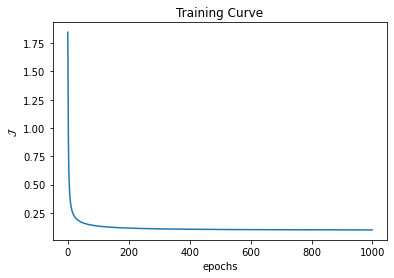

In [57]:
logreg.fit(X,y, show_curve=True)

In [58]:
y_hat=logreg.predict(X)

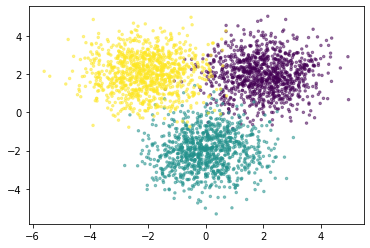

In [59]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=6)

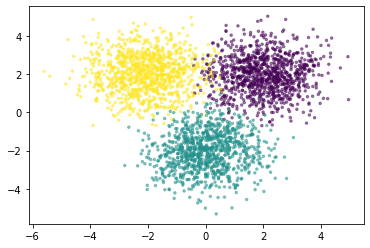

In [60]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y_hat, alpha=0.5, s=6)

In [61]:
accuracy(y,y_hat)

0.9646666666666667